In [1]:
import numpy as np
from numpy import *
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from matplotlib import *

In [2]:
#导入数据
mem = Memory("./mycache1")
@mem.cache
def get_data():
    data = load_svmlight_file("australian_scale.txt")
    return data[0], data[1]
X, y = get_data()

In [3]:
  # 划分训练集以及验证集
Y=mat(y).T
X_train, X_validation, Y_train, Y_validation = train_test_split(  X, Y, test_size=0.23, random_state=42)

In [4]:
#更改训练集，验证集格式
X1_train=transpose(X_train.todense()).T
X1_validation=transpose(X_validation.todense()).T

In [5]:
def Gradent_w(X,y,w,b,epoch):
    G=[0 for i in range(X.shape[1])]
    for i in range(y.size):
        if(1-(y[i,0])*((X*w)[i,0])-b>=0):
            for j in range(X.shape[1]):
                G[j]=G[j]-y[i,0]*X[i,j]
    return mat(G).T

In [6]:
def computeLoss(X,y,w,b,epoch):
    L=[0 for i in range(y.size)]
    l=0
    for i in range(y.size):
        if(1-(y[i,0])*((X*w)[i,0])-b>=0):
            L[i]=1-(y[i,0])*((X*w)[i,0])-b
    for i in range(y.size):
        l=l+L[i]
    l=l*epoch   
    for i in range(X.shape[1]):
        l=l+(w[i,0]**2)/2
    return l/y.size

In [7]:
def Gradent_b(X,y,w,b):
    G=0
    for i in range(y.size):
        if(1-(y[i,0])*((X*w)[i,0])-b>=0):
            G=G-y[i,0]
    return G 

In [11]:
#初始化参数
w=mat(zeros((14,1))) #全零初始化
C=0.1 #eooch
eta=0.001 #学习率
times=100  #学习次数
count=[]
L_train=[]
L_validation=[]
b=0
for i in range(times):
    w=w-eta*(w+C*Gradent_w(X1_train,Y_train,w,b,C))
    b=b-eta*(C*Gradent_b(X1_train,Y_train,w,b))
    L_train.append(computeLoss(X1_train,Y_train,w,b,C))
    L_validation.append(computeLoss(X1_validation,Y_validation,w,b,C))
for i in range(times):
    count.append(i)

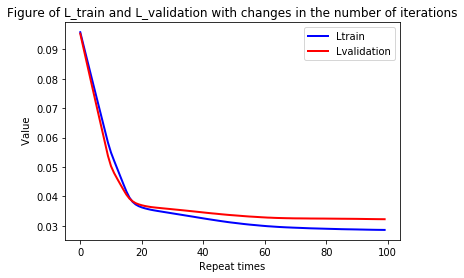

In [12]:
#画图部分
x = count
y1 = L_train
y2 = L_validation
plt.plot(x,y1,"b-",linewidth=2,label='Ltrain')
plt.plot(x,y2,"r-",linewidth=2,label='Lvalidation')
plt . ylabel (" Value"  )  
plt . xlabel ("Repeat times"  )  
plt . title ('Figure of L_train and L_validation with changes in the number of iterations')    
plt.legend()  
plt.show()  